# 【課題】富士山を超える最小の折る回数

厚さが「富士山(3776m)」を超えるのは何回紙を折った時か計算するプログラムを作成してください。

In [9]:
thickness=0.00008
fold_number=0
mount_fuji=3776

while True:
    fold_number += 1
    fold_thickness = thickness*2**fold_number
    if fold_thickness > mount_fuji:
        break

print('富士山({}m)を超えるのは{}回折ったときです'.format(mount_fuji, fold_number))

富士山(3776m)を超えるのは26回折ったときです


In [10]:
thickness*2**26　#検算

5368.70912

# 【課題】任意の厚さに対応した関数を作成
  
 距離を入力すると、何回折った時に超えるかを出力する関数を作成してください。引数として、折る前の厚さ 
t0も設定できるようにしましょう。

この関数を利用して、「最も近い太陽以外の恒星」に到達するには紙を何回折る必要があるか計算してください。「最も近い太陽以外の恒星」の距離は調査してください。
 

In [11]:
def fold_number_function(length, t0=0.00008):  #t0 = 折る前の長さ
    thickness=t0
    fold_number=0

    while True:
        fold_number += 1
        fold_thickness = thickness*2**fold_number
        if fold_thickness > length:
            break
    return fold_number

In [15]:
fold_number_function(3776)  #検算

26

In [26]:
# 最も近い太陽以外の恒星	プロキシマ・ケンタウリ	4.243光年

L=4.243 * 9460730472580800

In [27]:
thickness=0.00008
fold_number_function(L, thickness)

69

In [28]:
print('最も近い太陽以外の恒星までの距離は{}mであり、紙の厚さが{}mだと、{}回折ると超える'.format(L, thickness, fold_number_function(L, thickness)))

最も近い太陽以外の恒星までの距離は4.014187939516034e+16mであり、紙の厚さが8e-05mだと、69回折ると超える


# 【課題】必要な紙の長さ
 
 実際のところ身近にある紙は43回はおろか10回も折れません。しかし、大きな紙ほどたくさん折ることができ、トイレットペーパーのような長い紙を一方向に折ることを考えた時の折れる回数を求める公式が存在します。

厚さ t0の紙をn回折るために必要な紙の長さLは以下の公式で求まります。

$$L=\pi*t_0/6*(2^n+4)(2^n-1)
$$

この公式を利用して、実際に紙を折り任意の厚さに到達するために必要な紙の長さを求める関数を作成してください。

そしてこれを使って「月」「富士山」「最も近い太陽以外の恒星」に届くために必要な紙の長さを求めてください。

In [39]:
import math

def length_paper(fold_number, t0=0.00008):
    L=(math.pi)*t0/6*(2**fold_number+4)*(2**fold_number-1)
    return L

In [50]:
print('富士山({}m)には、{}回折って、{}mの長さが必要です'.format(mount_fuji, fold_number_function(mount_fuji), length_paper(fold_number_function(mount_fuji))))

富士山(3776m)には、26回折って、188646348487.24017mの長さが必要です


In [52]:
L_moon=384400*1000
print('月({}m)には{}回折って、{}mの長さが必要です'.format(L_moon, fold_number_function(L_moon), length_paper(fold_number_function(L_moon))))

月(384400000m)には43回折って、3.240919444170781e+21mの長さが必要です


In [53]:
print('最も近い太陽以外の恒星({}m)には{}回折って、{}mの長さが必要です'.format(L, fold_number_function(L), length_paper(fold_number_function(L))))

最も近い太陽以外の恒星(4.014187939516034e+16m)には69回折って、1.4595803601100348e+37mの長さが必要です


In [56]:
Length_graph=[length_paper(i) for i in range(0,12)]

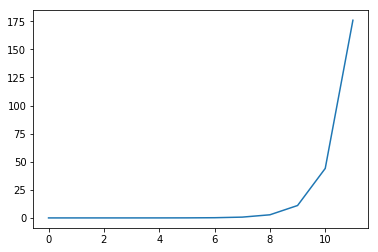

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

#必要な長さを図示（x: n回, y: 長さ） 　関数の図示

plt.plot(Length_graph)

In [85]:
n=20
L1=[1000*i for i in range(n)]
#L1

In [86]:
L_x=[fold_number_function(L1[i]) for i in range(n)]
L_y=[length_paper(fold_number_function(L1[i])) for i in range(n)]

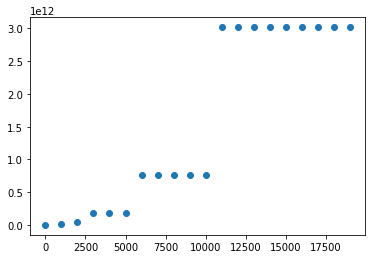

In [88]:
ｐｌｔ.scatter(L1, L_y) #x: 到達すべき距離、 y: 折り曲げるのに必要な長さ